# Feature importance methods

In [9]:
import pandas as pd
import joblib
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join("..", "src")))
from eda import *
from processing import *
from scaling import *
from sklearn.model_selection import train_test_split

In [65]:
df = pd.read_csv('../data/train.csv')
df.reset_index(drop=True, inplace=True)
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.33, random_state=42)

In [46]:
# load all new columns and preprocessing we did before in EDA
base_pipe = joblib.load('../pipelines/text_pipeline.joblib')

scaling_pipeline = Pipeline([
    
    ('feature_scaling', FeatureScaler())
])


joblib.dump(scaling_pipeline, '../pipelines/scaling_pipeline.joblib')

['../pipelines/scaling_pipeline.joblib']

In [66]:
base_pipe.fit_transform(X_train)
scaling_pipeline.fit_transform(X_train)

base_pipe.fit_transform(X_test)
scaling_pipeline.fit_transform(X_test)

base_pipe.fit_transform(df)
scaling_pipeline.fit_transform(df)

,id,keyword,location,text,target,count_caps_lock,count_exclamation_mark,count_hashtags,count_words,count_punctuation,...,positive,surprise,negative,joy,anticip,anticipation,sadness,processed_text,processed_text_str,mention_god_related
0,-1.734489,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.152138,0.032859,-0.248776,0.518250,-0.332085,-1.261466,...,-1.132287,1.082608,0.578109,-0.874716,-0.756495,-0.334233,0.902172,"[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive us,9.828660
1,-1.733532,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.152138,-0.464471,-0.248776,-0.402936,-1.378798,-1.261466,...,-1.132287,-0.923695,-1.729779,-0.874716,-0.756495,-0.334233,-1.108436,"[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,-0.101743
2,-1.733214,NaN,NaN,All residents asked to 'shelter in place' are ...,1.152138,-0.464471,-0.248776,-0.402936,1.237985,-0.830088,...,0.883168,-0.923695,0.578109,-0.874716,-0.756495,2.991928,-1.108436,"[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...,-0.101743
3,-1.732895,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.152138,-0.464471,-0.248776,0.518250,-1.204346,-1.045777,...,-1.132287,-0.923695,0.578109,-0.874716,-0.756495,-0.334233,-1.108436,"[people, receive, wildfire, evacuation, order,...",people receive wildfire evacuation order calif...,-0.101743
4,-1.732576,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.152138,-0.464471,-0.248776,1.439436,0.191272,-1.045777,...,-1.132287,-0.923695,-1.729779,-0.874716,-0.756495,-0.334233,-1.108436,"[get, send, photo, ruby, alaska, smoke, wildfi...",get send photo ruby alaska smoke wildfire pour...,-0.101743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,1.730067,NaN,NaN,Two giant cranes holding a bridge collapse int...,1.152138,-0.464471,-0.248776,-0.402936,-0.680989,-0.398711,...,-1.132287,-0.923695,-1.729779,-0.874716,-0.756495,-0.334233,-1.108436,"[two, giant, crane, hold, bridge, collapse, ne...",two giant crane hold bridge collapse nearby home,-0.101743
7609,1.730386,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1.152138,-0.464471,-0.248776,-0.402936,0.889081,-0.614400,...,-1.132287,1.082608,0.578109,-0.874716,-0.756495,-0.334233,-1.108436,"[control, wild, fire, california, even, northe...",control wild fire california even northern par...,-0.101743
7610,1.730705,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1.152138,0.530190,-0.248776,-0.402936,-1.204346,0.895421,...,0.883168,1.082608,0.578109,1.143228,1.321886,-0.334233,0.902172,"[volcano, hawaii]",volcano hawaii,-0.101743
7611,1.731024,NaN,NaN,Police investigating after an e-bike collided ...,1.152138,-0.464471,-0.248776,-0.402936,0.714629,-0.398711,...,0.883168,-0.923695,0.578109,-0.874716,-0.756495,-0.334233,-1.108436,"[police, investigate, ebike, collide, car, lit...",police investigate ebike collide car little po...,-0.101743


## Correlation matrix

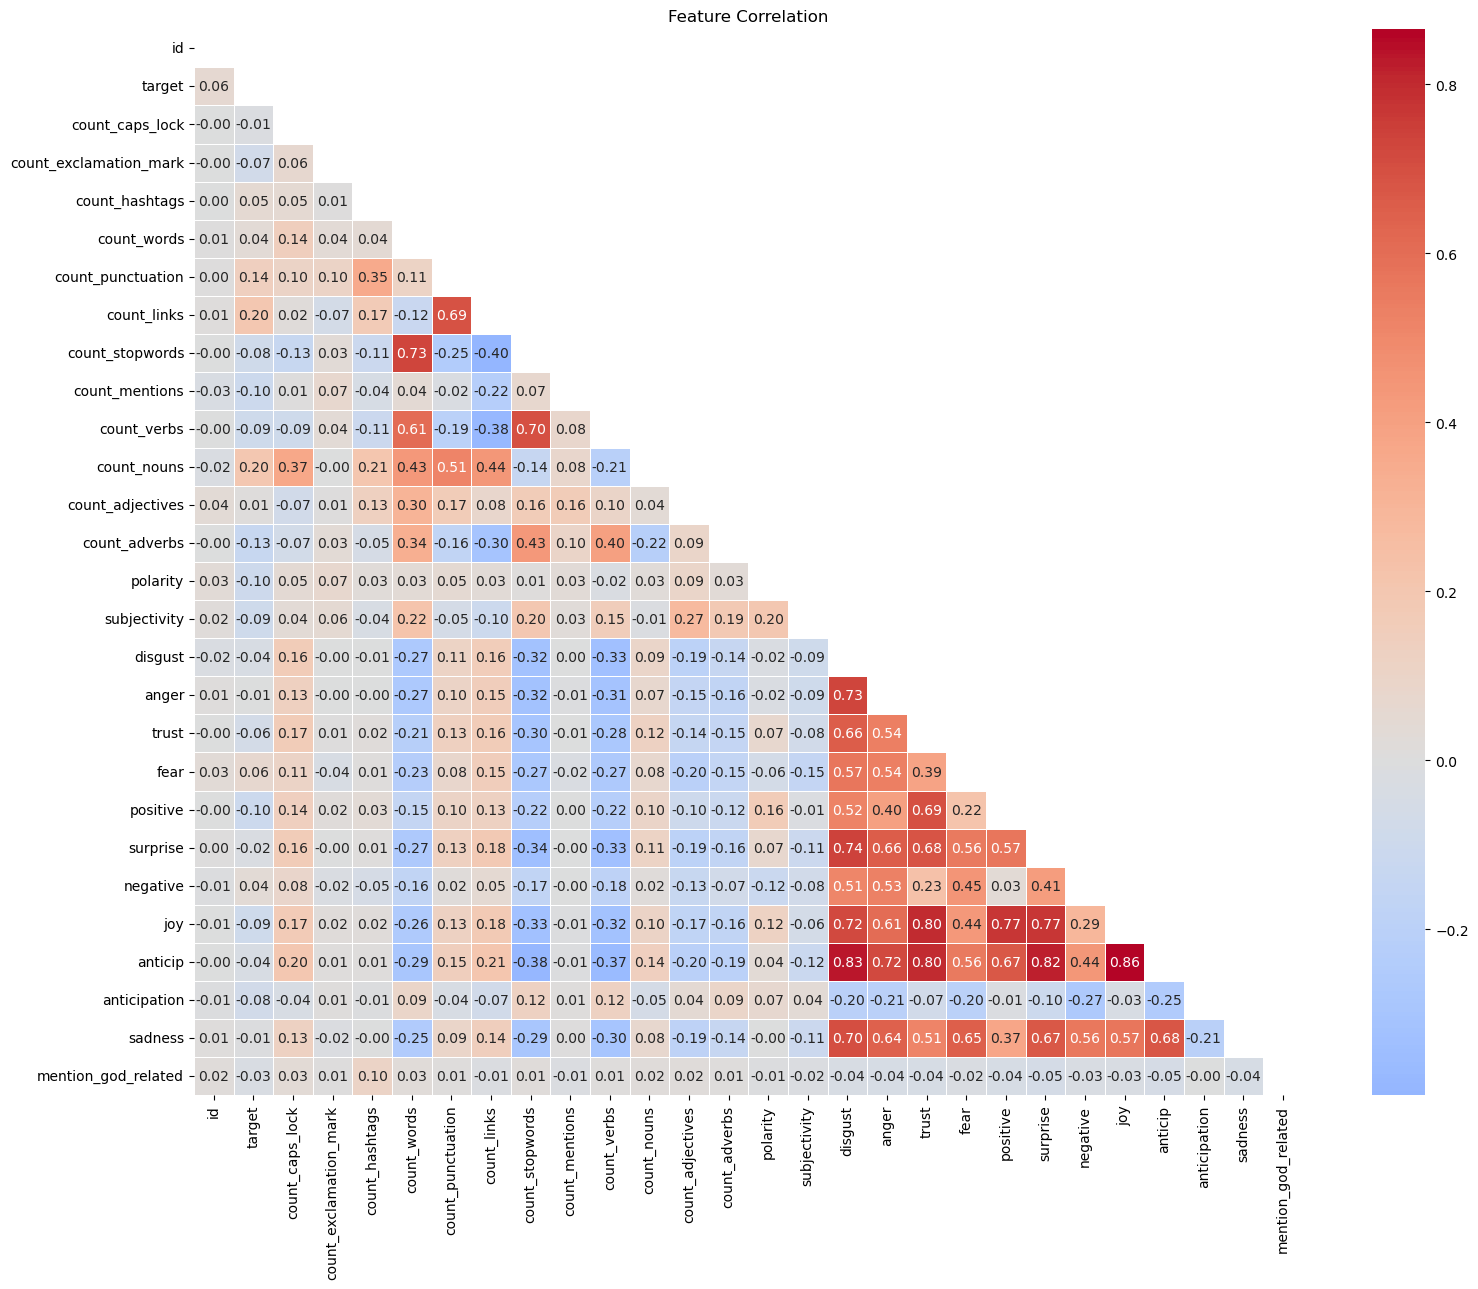

In [67]:
numeric_cols = df.select_dtypes(include=['number'])
correlations = numeric_cols.corr()
mask = np.triu(np.ones_like(correlations, dtype=bool))
plt.figure(figsize=(16,13))
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, mask=mask, center=0)
plt.title('Feature Correlation')
plt.tight_layout()
plt.show()


New added emotions have a high correlation with each other, so we will leave only the ones that have the biggest correlation with the target

We will check the importance of all new added columns to see if any of them can be relevant to the models

## Recursive elimination

Using only new columns (without text) vs target

In [68]:
X_train_new_cols = X_train[['count_caps_lock', 'count_exclamation_mark',
       'count_hashtags', 'count_words', 'count_punctuation', 'count_links',
       'count_stopwords', 'count_mentions', 'count_verbs', 'count_nouns',
       'count_adjectives', 'count_adverbs', 'polarity', 'subjectivity',
        'positive','fear', 'mention_god_related']]
X_test_new_cols = X_test[[ 'count_caps_lock', 'count_exclamation_mark',
       'count_hashtags', 'count_words', 'count_punctuation', 'count_links',
       'count_stopwords', 'count_mentions', 'count_verbs', 'count_nouns',
       'count_adjectives', 'count_adverbs', 'polarity', 'subjectivity',
        'positive','fear', 'mention_god_related']]

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE
X_train = X_train_new_cols
X_test = X_test_new_cols
model = LogisticRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

f1 = f1_score(predictions, Y_test)
print("f1 score with all columns:" ,f1)


f1 score with all columns: 0.5623721881390592


In [71]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [72]:
rfe = RFE(model, step=1)
result = rfe.fit(X_train, Y_train)
print("Remaining feature number: ", result.n_features_)
print("Feature ranking: ", result.ranking_)

Remaining feature number:  8
Feature ranking:  [ 1  1  9  6  8  1 10  1  7  1  4  1  1  2  1  3  5]


In [73]:
selected_features = pd.DataFrame({"Feature": list(X_train.columns), "Ranking": rfe.ranking_})
selected_features

,Feature,Ranking
0,count_caps_lock,1
1,count_exclamation_mark,1
2,count_hashtags,9
3,count_words,6
4,count_punctuation,8
5,count_links,1
6,count_stopwords,10
7,count_mentions,1
8,count_verbs,7
9,count_nouns,1


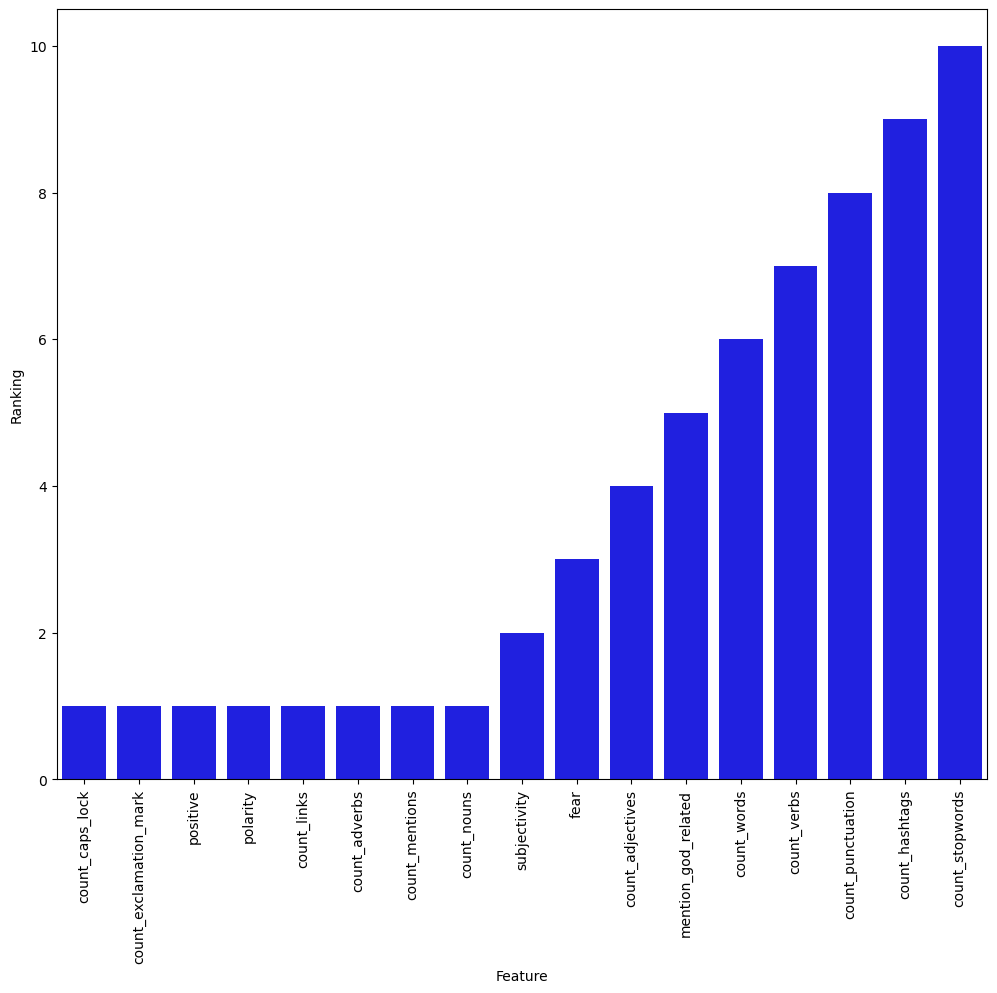

In [74]:
X_sorted = selected_features.sort_values(by='Ranking')
plt.figure(figsize=(12,10))
sns.barplot( x=X_sorted['Feature'], y=X_sorted['Ranking'], color='blue')
plt.xticks(rotation=90)
plt.show()

**According to this method most important new columns are:**
* count_caps_lock
* count_exclamation
* positive
* polarity
* count_links
* count_adverbs
* count_mentions
* count_nouns

## Random Forest feature importance

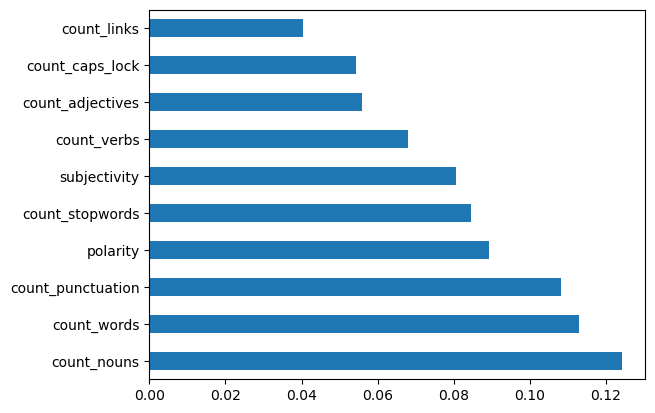

In [75]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,Y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

**The most important features according to Random Forest:**
* count_nouns
* count_words
* count_punctuation
* polarity
* subjectivity
* count_verbs
* count_adjectives
* count_caps_lock
* count_links

## Select K Best

In [78]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=5)
selector.fit(X_train, Y_train)
X_k_best = selector.transform(X_train)
selected_features_mask = selector.get_support()

selected_features = X_train.columns[selected_features_mask]

print("Selected Features:", selected_features)

Selected Features: Index(['count_words', 'count_punctuation', 'count_links', 'count_nouns',
       'polarity'],
      dtype='object')


**Most important features from KBest**
* word count
* punctuation count
* links count
* nouns count
* polarity